In [ ]:
from google.colab import drive
#drive.flush_and_unmount()  # Limpiar monturas previas
drive.mount("/content/drive")  #Se lee el contenido del drive

In [ ]:
!pip install ultralytics
#Se instala ultralytics

In [ ]:
!pip install gdown  # Si no está instalado
!gdown --id 1l2iowZ4niLEhFMnPmh5CgMiDE2iRmR3C -O /content/data.zip #Descargar dataset
!gdown --id 1ZocrQk6quvnnyGfSz7PANML42_u9BjuG -O /content/dataset.yaml #Descaragr Yaml
!unzip -q "/content/data.zip" -d "/content/data" #Descomprimir Dataset
print("Listo")

In [ ]:
from ultralytics import YOLO
import os
import shutil
from datetime import datetime

# Configuración global
project_dir = "/content/drive/MyDrive/C2A"  # Carpeta principal
max_runs = 3  # Máximo de ejecuciones guardadas (cada una en su carpeta)
checkpoints_to_keep = 3  # Checkpoints por ejecución (last.pt + 2 anteriores)
experiment_name = "exp_20250309_035303"  # Nombre fijo
checkpoint_path = os.path.join(project_dir, experiment_name, "weights", "last.pt")
print("cargando desde: ",checkpoint_path)

# 1. Cargar modelo desde last.pt (si existe)
if os.path.exists(checkpoint_path):
    model = YOLO(checkpoint_path)
# 1. Generar nombre único para esta ejecución (fecha + hora)
exec_id = datetime.now().strftime("%Y%m%d_%H%M%S")
current_exp = f"exp_{exec_id}"  # Ej: exp_20240515_143022

# 2. Eliminar ejecuciones antiguas (más de 'max_runs')
all_exps = sorted([d for d in os.listdir(project_dir) if d.startswith("exp_")])
for old_exp in all_exps[:-max_runs]:  # Conserva las últimas 'max_runs'
    shutil.rmtree(os.path.join(project_dir, old_exp))
    print(f"✅ Eliminada ejecución antigua: {old_exp}")

# 3. Entrenar modelo (nueva ejecución)
model.train(
    data="/content/dataset.yaml",
    epochs=600,
    patience=20,  # Detiene si no hay mejora en 20 épocas
    imgsz=640,
    batch=16,
    project=project_dir,
    name=current_exp,  # Carpeta única para esta ejecución
    save_period=1,  # Guardar checkpoint cada época
)

# 4. Limpiar checkpoints dentro de esta ejecución (quedan 'checkpoints_to_keep')
def clean_checkpoints(exp_name, keep=checkpoints_to_keep):
    checkpoint_dir = os.path.join(project_dir, exp_name, "weights")
    if os.path.exists(checkpoint_dir):
        files = sorted(
            [f for f in os.listdir(checkpoint_dir) if f.endswith(".pt")],
            key=lambda x: os.path.getmtime(os.path.join(checkpoint_dir, x)),
        )
        for f in files[:-keep]:
            os.remove(os.path.join(checkpoint_dir, f))
            print(f"🗑️ Checkpoint eliminado: {f}")

clean_checkpoints(current_exp)  # Ejecutar al final

In [ ]:
from ultralytics import YOLO
import os

project_dir = "/content/drive/MyDrive/C2A"
experiment_name = "exp_20250309_035303"  # Nombre fijo
checkpoint_path = os.path.join(project_dir, experiment_name, "weights", "last.pt")
print("cargando desde: ",checkpoint_path)

# 1. Cargar modelo desde last.pt (si existe)
if os.path.exists(checkpoint_path):
    model = YOLO(checkpoint_path)

model.train(
    data="/content/dataset.yaml",
    epochs=20,
    project=project_dir,
    name=experiment_name,
    resume=True
)
# 3. Limpiar checkpoints antiguos (opcional)
def clean_checkpoints(keep=3):
    checkpoint_dir = os.path.join(project_dir, experiment_name, "weights")
    if os.path.exists(checkpoint_dir):
        files = sorted(
            [f for f in os.listdir(checkpoint_dir) if f.endswith(".pt")],
            key=lambda x: os.path.getmtime(os.path.join(checkpoint_dir, x)),
        )
        for f in files[:-keep]:
            os.remove(os.path.join(checkpoint_dir, f))
            print(f"🗑️ Eliminado: {f}")

clean_checkpoints()

cargando desde:  /content/drive/MyDrive/C2A/exp_20250309_035303/weights/last.pt
Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/C2A/exp_20250309_035303/weights/last.pt, data=/content/dataset.yaml, epochs=600, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/C2A, name=exp_20250309_035303, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/content/drive/MyDrive/C2A/exp_20250309_035303/weights/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visu

100%|██████████| 755k/755k [00:00<00:00, 80.8MB/s]


TensorBoard: Start with 'tensorboard --logdir /content/drive/MyDrive/C2A/exp_20250309_035303', view at http://localhost:6006/

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f     

100%|██████████| 5.35M/5.35M [00:00<00:00, 230MB/s]


AMP: checks passed ✅


train: Scanning /content/data/data/train/labels... 6129 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6129/6129 [00:17<00:00, 344.16it/s]


train: WARNING ⚠️ /content/data/data/train/images/flood_image0407_3.png: 1 duplicate labels removed
train: New cache created: /content/data/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/data/data/val/labels... 2043 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2043/2043 [00:06<00:00, 331.78it/s]

val: New cache created: /content/data/data/val/labels.cache


Plotting labels to /content/drive/MyDrive/C2A/exp_20250309_035303/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Resuming training /content/drive/MyDrive/C2A/exp_20250309_035303/weights/last.pt from epoch 159 to 600 total epochs
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/C2A/exp_20250309_035303
Starting training for 600 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/600      6.23G      1.094     0.6729     0.9291        118        640: 100%|██████████| 384/384 [03:13<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:42<00:00,  1.49it/s]


                   all       2043      72123      0.841      0.718      0.781      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/600      4.16G        1.1     0.6766     0.9289         16        640: 100%|██████████| 384/384 [03:02<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:38<00:00,  1.67it/s]


                   all       2043      72123      0.842      0.718      0.781      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/600      4.79G      1.103     0.6773     0.9308         31        640: 100%|██████████| 384/384 [03:04<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:40<00:00,  1.57it/s]


                   all       2043      72123      0.842      0.718      0.781      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/600      4.46G      1.103       0.68     0.9324         29        640: 100%|██████████| 384/384 [03:08<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:38<00:00,  1.65it/s]


                   all       2043      72123      0.842      0.718      0.781      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/600      4.48G      1.105     0.6799     0.9314         25        640: 100%|██████████| 384/384 [03:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:39<00:00,  1.63it/s]


                   all       2043      72123      0.842      0.718      0.781      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/600      5.12G      1.101     0.6793     0.9328         36        640: 100%|██████████| 384/384 [03:04<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:40<00:00,  1.58it/s]


                   all       2043      72123      0.842      0.718      0.781      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/600      4.45G      1.102     0.6812     0.9332         19        640: 100%|██████████| 384/384 [03:05<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:39<00:00,  1.62it/s]


                   all       2043      72123      0.842      0.718      0.781      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/600      4.54G      1.104      0.683     0.9336         76        640: 100%|██████████| 384/384 [03:08<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:39<00:00,  1.62it/s]


                   all       2043      72123      0.841      0.719      0.781      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/600      4.97G      1.107     0.6832     0.9326         63        640: 100%|██████████| 384/384 [03:05<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:38<00:00,  1.68it/s]


                   all       2043      72123      0.843      0.718      0.781      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/600       4.8G        1.1     0.6798     0.9316         19        640: 100%|██████████| 384/384 [03:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:39<00:00,  1.61it/s]


                   all       2043      72123      0.842      0.718      0.781      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/600      4.09G      1.104     0.6823     0.9319         32        640: 100%|██████████| 384/384 [03:08<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:39<00:00,  1.60it/s]


                   all       2043      72123      0.843      0.718      0.781      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/600      3.98G      1.111     0.6853     0.9327         15        640: 100%|██████████| 384/384 [03:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:39<00:00,  1.61it/s]


                   all       2043      72123      0.843      0.718      0.781      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/600      4.34G      1.108     0.6845     0.9326         77        640: 100%|██████████| 384/384 [03:08<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:38<00:00,  1.67it/s]


                   all       2043      72123      0.843      0.718      0.781      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/600      5.46G      1.115     0.6887     0.9341         64        640: 100%|██████████| 384/384 [03:05<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:39<00:00,  1.63it/s]


                   all       2043      72123      0.843      0.718      0.781      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/600      5.51G      1.107     0.6849     0.9333         29        640: 100%|██████████| 384/384 [03:02<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:39<00:00,  1.63it/s]


                   all       2043      72123      0.843      0.718      0.781      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/600      5.28G      1.103     0.6844     0.9333         95        640: 100%|██████████| 384/384 [03:02<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:38<00:00,  1.67it/s]


                   all       2043      72123      0.843      0.718      0.781      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/600      4.63G      1.108     0.6867     0.9339         38        640: 100%|██████████| 384/384 [03:04<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:39<00:00,  1.63it/s]


                   all       2043      72123      0.842      0.719      0.781      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/600      4.21G      1.107     0.6903     0.9361         24        640: 100%|██████████| 384/384 [03:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:38<00:00,  1.65it/s]


                   all       2043      72123      0.842      0.719      0.781      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/600      3.94G      1.108     0.6876      0.933         28        640: 100%|██████████| 384/384 [03:05<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:37<00:00,  1.72it/s]


                   all       2043      72123      0.842      0.719      0.781      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/600      4.43G      1.112     0.6897     0.9346         35        640: 100%|██████████| 384/384 [03:03<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:38<00:00,  1.64it/s]


                   all       2043      72123      0.842      0.719      0.781      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/600      5.07G      1.105     0.6879     0.9327         73        640: 100%|██████████| 384/384 [03:03<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:38<00:00,  1.68it/s]


                   all       2043      72123      0.842      0.719      0.782      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/600      5.77G      1.104     0.6859     0.9324         27        640: 100%|██████████| 384/384 [03:01<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:37<00:00,  1.69it/s]


                   all       2043      72123      0.842       0.72      0.782      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/600      3.67G       1.11     0.6905     0.9328         43        640: 100%|██████████| 384/384 [03:01<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:38<00:00,  1.65it/s]


                   all       2043      72123      0.841       0.72      0.782      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/600      4.52G      1.105     0.6862     0.9328         63        640: 100%|██████████| 384/384 [03:02<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:38<00:00,  1.65it/s]


                   all       2043      72123      0.842       0.72      0.782      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/600      4.57G      1.108     0.6875     0.9337         33        640: 100%|██████████| 384/384 [03:02<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:38<00:00,  1.68it/s]


                   all       2043      72123      0.842       0.72      0.782      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/600      3.73G      1.102     0.6849     0.9316         31        640: 100%|██████████| 384/384 [03:00<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:40<00:00,  1.56it/s]


                   all       2043      72123      0.842       0.72      0.782      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/600      4.58G      1.105     0.6894     0.9331         12        640: 100%|██████████| 384/384 [03:08<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:41<00:00,  1.55it/s]


                   all       2043      72123      0.842       0.72      0.782      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/600      5.03G       1.11     0.6877      0.933         37        640: 100%|██████████| 384/384 [03:04<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:38<00:00,  1.65it/s]


                   all       2043      72123      0.843       0.72      0.782      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/600      4.73G      1.112     0.6902     0.9332         33        640: 100%|██████████| 384/384 [03:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:38<00:00,  1.67it/s]


                   all       2043      72123      0.842       0.72      0.782      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/600      5.03G      1.105     0.6854     0.9321         39        640: 100%|██████████| 384/384 [03:04<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:39<00:00,  1.62it/s]


                   all       2043      72123      0.842       0.72      0.782      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/600      4.36G      1.107     0.6896     0.9315         99        640: 100%|██████████| 384/384 [03:05<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:41<00:00,  1.56it/s]


                   all       2043      72123      0.841       0.72      0.782      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/600      3.49G      1.113     0.6967     0.9351        104        640: 100%|██████████| 384/384 [03:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:40<00:00,  1.58it/s]


                   all       2043      72123      0.842       0.72      0.782      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/600      4.56G      1.106     0.6848      0.932         66        640: 100%|██████████| 384/384 [03:05<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:39<00:00,  1.61it/s]


                   all       2043      72123      0.841      0.721      0.782      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/600      4.61G        1.1     0.6856     0.9336         40        640: 100%|██████████| 384/384 [03:07<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:41<00:00,  1.55it/s]


                   all       2043      72123      0.841      0.721      0.782      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/600      5.27G      1.107     0.6889     0.9327         21        640: 100%|██████████| 384/384 [03:05<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:40<00:00,  1.57it/s]


                   all       2043      72123      0.841       0.72      0.782      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/600      3.77G      1.103     0.6857      0.931         38        640: 100%|██████████| 384/384 [03:05<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:39<00:00,  1.62it/s]


                   all       2043      72123      0.841      0.721      0.782      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/600      4.59G      1.098     0.6821     0.9316         22        640: 100%|██████████| 384/384 [03:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:38<00:00,  1.66it/s]


                   all       2043      72123      0.842       0.72      0.782      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/600      4.07G      1.102      0.685     0.9326         32        640: 100%|██████████| 384/384 [03:04<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:38<00:00,  1.65it/s]


                   all       2043      72123      0.841      0.721      0.782      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/600      4.55G      1.106      0.686     0.9326        799        640:  91%|█████████ | 350/384 [02:49<00:20,  1.67it/s]

In [ ]:
from ultralytics import YOLO
import os
import shutil
from datetime import datetime

# Configuración global
project_dir = "/content/drive/MyDrive/C2A"  # Carpeta principal
max_runs = 3  # Máximo de ejecuciones guardadas (cada una en su carpeta)
checkpoints_to_keep = 3  # Checkpoints por ejecución (last.pt + 2 anteriores)
experiment_name = "exp_20250317_201102"  # Nombre fijo
checkpoint_path = os.path.join(project_dir, experiment_name, "weights", "last.pt")

print(f"Cargando desde: {checkpoint_path}")

# 1. Cargar modelo desde last.pt (si existe)
model = YOLO(checkpoint_path) if os.path.exists(checkpoint_path) else YOLO("yolov8n.pt")  # Cargar modelo preentrenado si no existe checkpoint

# 2. Generar nombre único para esta ejecución (fecha + hora)
exec_id = datetime.now().strftime("%Y%m%d_%H%M%S")
current_exp = f"exp_{exec_id}"  # Ej: exp_20240515_143022

# 3. Eliminar ejecuciones antiguas (más de 'max_runs')
all_exps = sorted(
    [d for d in os.listdir(project_dir) if d.startswith("exp_")],
    key=lambda x: os.path.getmtime(os.path.join(project_dir, x)),  # Ordenar por fecha de modificación
    reverse=True
)

for old_exp in all_exps[max_runs:]:  # Conserva las últimas 'max_runs'
    shutil.rmtree(os.path.join(project_dir, old_exp))
    print(f"✅ Eliminada ejecución antigua: {old_exp}")

# 4. Entrenar modelo (nueva ejecución)
model.train(
    data="/content/dataset.yaml",
    epochs=600,
    patience=20,  # Detiene si no hay mejora en 20 épocas
    imgsz=640,
    batch=16,
    project=project_dir,
    name=current_exp,  # Carpeta única para esta ejecución
    save_period=1,  # Guardar checkpoint cada época
)

# 5. Limpiar checkpoints dentro de esta ejecución (quedan 'checkpoints_to_keep')
def clean_checkpoints(exp_name, keep=checkpoints_to_keep):
    checkpoint_dir = os.path.join(project_dir, exp_name, "weights")
    if os.path.exists(checkpoint_dir):
        files = sorted(
            [f for f in os.listdir(checkpoint_dir) if f.endswith(".pt")],
            key=lambda x: os.path.getmtime(os.path.join(checkpoint_dir, x)),  # Ordenar por fecha de modificación
            reverse=True
        )
        for f in files[keep:]:  # Eliminar todos excepto los 'keep' más recientes
            os.remove(os.path.join(checkpoint_dir, f))
            print(f"🗑️ Checkpoint eliminado: {f}")

clean_checkpoints(current_exp)  # Ejecutar al final

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Cargando desde: /content/drive/MyDrive/C2A/exp_20250309_035303/weights/last.pt
✅ Eliminada ejecución antigua: exp_20250309_0053012
✅ Eliminada ejecución antigua: exp_20250309_005301
Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/C2A/exp_20250309_035303/weights/last.pt, data=/content/dataset.yaml, epochs=600, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/C2A, name=exp_20250311_000011, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=Fa

100%|██████████| 755k/755k [00:00<00:00, 14.7MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 5.35M/5.35M [00:00<00:00, 66.7MB/s]


AMP: checks passed ✅


train: Scanning /content/data/data/train/labels... 6129 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6129/6129 [00:20<00:00, 300.11it/s]

train: WARNING ⚠️ /content/data/data/train/images/flood_image0407_3.png: 1 duplicate labels removed


train: New cache created: /content/data/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/data/data/val/labels... 2043 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2043/2043 [00:07<00:00, 291.74it/s]


val: New cache created: /content/data/data/val/labels.cache
Plotting labels to /content/drive/MyDrive/C2A/exp_20250311_000011/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/C2A/exp_20250311_000011
Starting training for 600 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/600      6.23G      1.053     0.6382     0.9204        118        640: 100%|██████████| 384/384 [03:34<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:44<00:00,  1.45it/s]


                   all       2043      72123      0.841      0.717       0.78      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/600      7.85G      1.064     0.6458     0.9203         16        640: 100%|██████████| 384/384 [03:24<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:42<00:00,  1.51it/s]


                   all       2043      72123      0.842      0.713      0.777      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/600      7.85G      1.089     0.6637     0.9262         31        640: 100%|██████████| 384/384 [03:22<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:39<00:00,  1.63it/s]


                   all       2043      72123      0.836      0.709       0.77      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/600      7.85G      1.109      0.683     0.9325         29        640: 100%|██████████| 384/384 [03:11<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:41<00:00,  1.56it/s]


                   all       2043      72123      0.837      0.703      0.766      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/600      7.85G      1.116     0.6867      0.933         25        640: 100%|██████████| 384/384 [03:08<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:38<00:00,  1.67it/s]


                   all       2043      72123      0.838      0.698      0.763      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/600      7.85G      1.115     0.6881     0.9354         36        640: 100%|██████████| 384/384 [03:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:38<00:00,  1.65it/s]


                   all       2043      72123      0.838      0.704      0.766      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/600      7.85G      1.115     0.6914     0.9357         19        640: 100%|██████████| 384/384 [03:04<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:38<00:00,  1.65it/s]


                   all       2043      72123      0.835      0.697      0.761      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/600      7.85G      1.118     0.6944     0.9367         76        640: 100%|██████████| 384/384 [03:07<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:37<00:00,  1.70it/s]


                   all       2043      72123      0.833      0.705      0.767      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/600      7.85G      1.122     0.6942     0.9359         63        640: 100%|██████████| 384/384 [03:05<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:38<00:00,  1.65it/s]


                   all       2043      72123      0.838      0.704      0.765      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/600      7.85G      1.115     0.6919     0.9354         19        640: 100%|██████████| 384/384 [03:11<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:37<00:00,  1.70it/s]


                   all       2043      72123      0.836      0.704      0.766      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/600      7.85G       1.12     0.6937      0.936         32        640: 100%|██████████| 384/384 [03:08<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:38<00:00,  1.68it/s]


                   all       2043      72123      0.843      0.702      0.768      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/600      7.85G      1.127     0.6963     0.9363         15        640: 100%|██████████| 384/384 [03:04<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:37<00:00,  1.70it/s]


                   all       2043      72123      0.834      0.705      0.768      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/600      7.85G      1.124     0.6973     0.9364         77        640: 100%|██████████| 384/384 [03:08<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:36<00:00,  1.74it/s]


                   all       2043      72123       0.83      0.699      0.758       0.48

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/600      7.85G      1.131        0.7     0.9374         64        640: 100%|██████████| 384/384 [03:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:36<00:00,  1.75it/s]


                   all       2043      72123      0.831      0.707      0.769      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/600      7.85G      1.122      0.697     0.9365         29        640: 100%|██████████| 384/384 [03:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:37<00:00,  1.69it/s]


                   all       2043      72123      0.829      0.701      0.766      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/600      7.85G       1.12     0.6964     0.9367         95        640: 100%|██████████| 384/384 [03:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:39<00:00,  1.61it/s]


                   all       2043      72123      0.831      0.701      0.765      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/600      7.85G      1.125     0.6995     0.9375         38        640: 100%|██████████| 384/384 [03:09<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:41<00:00,  1.53it/s]


                   all       2043      72123      0.836      0.705      0.768      0.502

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/600      7.85G      1.123     0.7022     0.9393         24        640: 100%|██████████| 384/384 [03:09<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:38<00:00,  1.68it/s]


                   all       2043      72123      0.835      0.699      0.766      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/600      7.85G      1.123     0.6999     0.9371         28        640: 100%|██████████| 384/384 [03:10<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:37<00:00,  1.71it/s]


                   all       2043      72123      0.837      0.705      0.769        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/600      7.85G      1.126     0.7024     0.9377         35        640: 100%|██████████| 384/384 [03:07<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:37<00:00,  1.71it/s]


                   all       2043      72123      0.836      0.706      0.769      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/600      7.85G      1.122     0.6996     0.9366         73        640: 100%|██████████| 384/384 [03:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:39<00:00,  1.61it/s]


                   all       2043      72123      0.836      0.707      0.769      0.503
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

21 epochs completed in 1.361 hours.
Optimizer stripped from /content/drive/MyDrive/C2A/exp_20250311_000011/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/C2A/exp_20250311_000011/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/C2A/exp_20250311_000011/weights/best.pt...
Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:48<00:00,  1.31it/s]


                   all       2043      72123      0.841      0.717       0.78      0.516
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to /content/drive/MyDrive/C2A/exp_20250311_000011
🗑️ Checkpoint eliminado: epoch19.pt
🗑️ Checkpoint eliminado: epoch18.pt
🗑️ Checkpoint eliminado: epoch17.pt
🗑️ Checkpoint eliminado: epoch16.pt
🗑️ Checkpoint eliminado: epoch15.pt
🗑️ Checkpoint eliminado: epoch14.pt
🗑️ Checkpoint eliminado: epoch13.pt
🗑️ Checkpoint eliminado: epoch12.pt
🗑️ Checkpoint eliminado: epoch11.pt
🗑️ Checkpoint eliminado: epoch10.pt
🗑️ Checkpoint eliminado: epoch9.pt
🗑️ Checkpoint eliminado: epoch8.pt
🗑️ Checkpoint eliminado: epoch7.pt
🗑️ Checkpoint eliminado: epoch6.pt
🗑️ Checkpoint eliminado: epoch5.pt
🗑️ Checkpoint eliminado: epoch4.pt
🗑️ Checkpoint eliminado: epoch3.pt
🗑️ Checkpoint eliminado: epoch2.pt
🗑️ Checkpoint eliminado: epoch1.pt
🗑️ Checkpoint eliminado: epoch0.pt


Cargando desde: /content/drive/MyDrive/C2A/exp_20250311_000011/weights/last.pt

image 1/1 /content/Exp.png: 640x640 31 persons, 9.0ms
Speed: 2.7ms preprocess, 9.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/B1.jpeg: 352x640 1 person, 7.1ms
Speed: 2.0ms preprocess, 7.1ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)

image 1/1 /content/Godin.jpg: 352x640 15 persons, 6.2ms
Speed: 1.7ms preprocess, 6.2ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)

image 1/1 /content/B2.jpg: 448x640 1 person, 6.7ms
Speed: 2.2ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


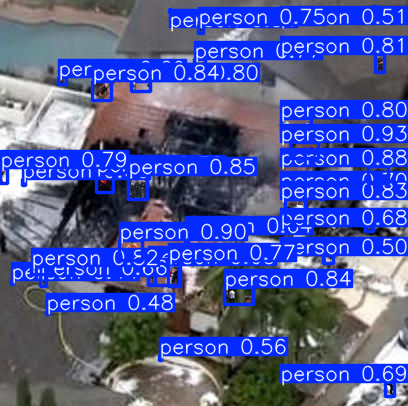

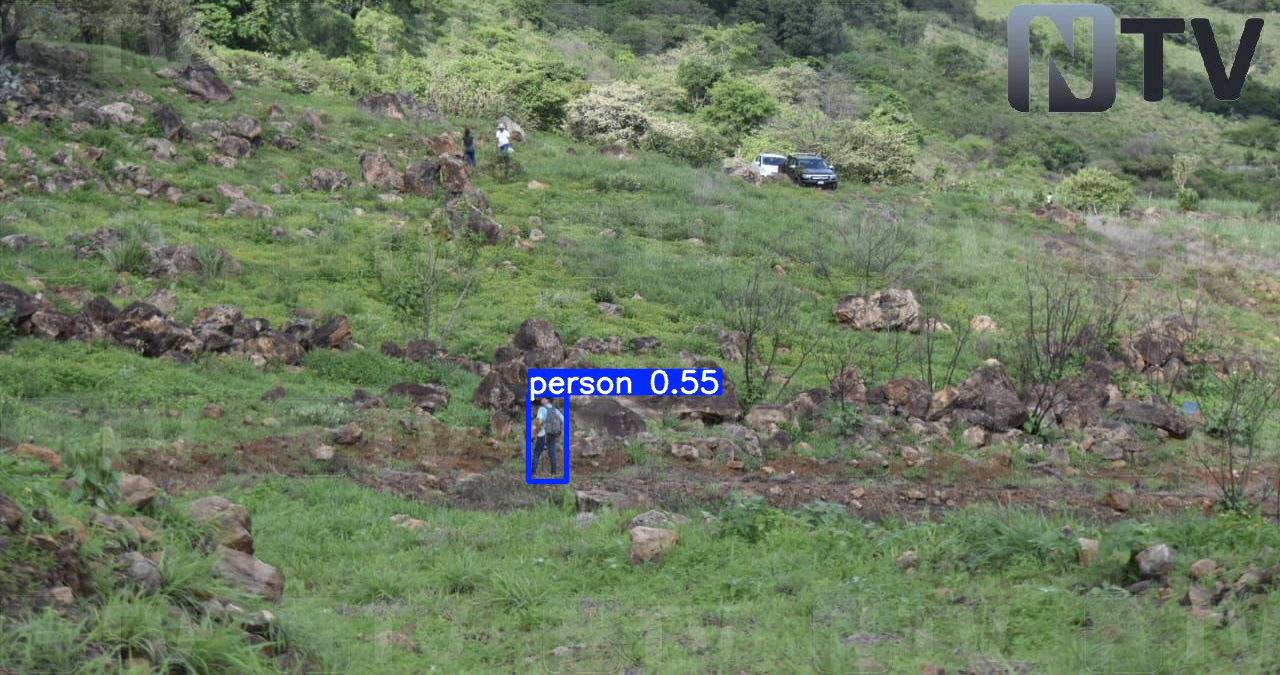

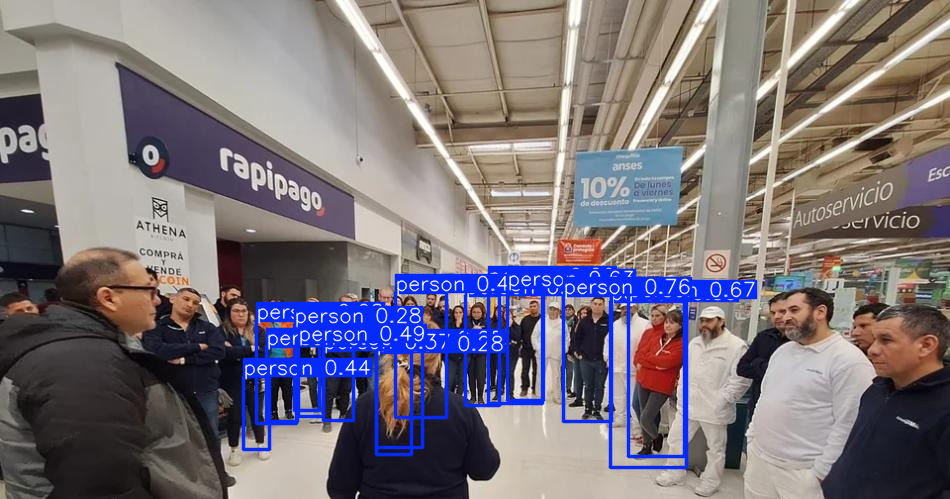

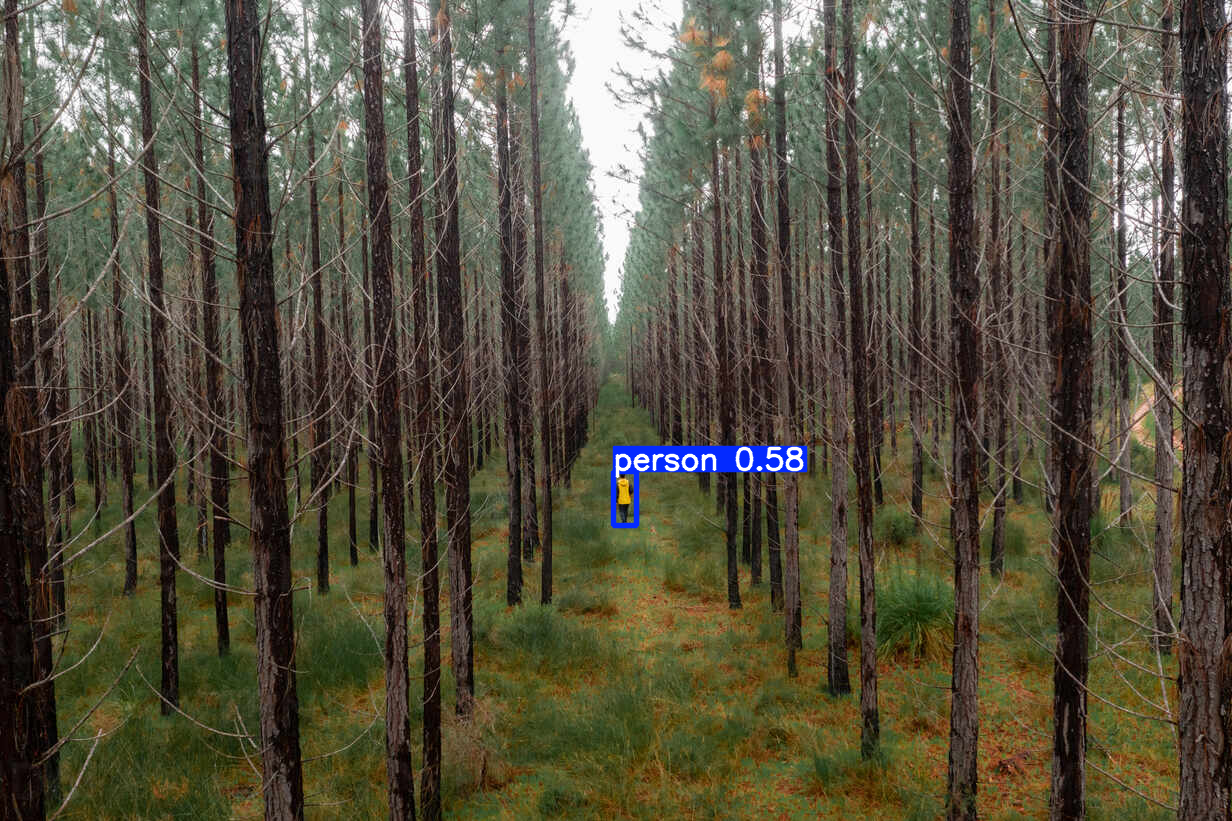

'result3.jpg'

In [ ]:
import os
from ultralytics import YOLO

project_dir = "/content/drive/MyDrive/C2A"  # Carpeta principal
experiment_name = "exp_20250311_000011"  # Nombre fijo
checkpoint_path = os.path.join(project_dir, experiment_name, "weights", "last.pt")
print(f"Cargando desde: {checkpoint_path}")
# 1. Cargar modelo desde last.pt (si existe)
if os.path.exists(checkpoint_path):
    model = YOLO(checkpoint_path)
# Hacer predicciones
results = model.predict(source="/content/T1.jpg", project="exp_20250311_000011", name="resultados")
results1 = model.predict(source="/content/T2.jpg", project="exp_20250311_000011", name="resultados")
results2 = model.predict(source="/content/T3.jpeg", project="exp_20250311_000011", name="resultados")
results3 = model.predict(source="/content/tt.jpg", project="exp_20250311_000011", name="resultados")
# Argumentos de visualización
save=True  # Guarda las imágenes/videos anotados
save_txt=False  # Guarda los resultados en archivo de texto
save_conf=False  # Incluye puntuaciones de confianza
save_crop=False  # Guarda las imágenes recortadas de las detecciones
results[0].show()  # muestra en pantalla
results1[0].show()
results2[0].show()
results3[0].show()

# Para guardar los resultados
results[0].save(filename="result.jpg")  # guarda en disco
results1[0].save(filename="result1.jpg")
results2[0].save(filename="result2.jpg")
results3[0].save(filename="result3.jpg")